<a href="https://colab.research.google.com/github/vincenzomartello/ERExplain/blob/master/examples/explainDeepmatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explain Deepmatcher models at attribute-level

## Step 0 install required packages
We install deepmatcher, as example of Entity Resolution system, and erexplain, to explain any ER model

In [1]:
!pip install deepmatcher
!pip install erexplain

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 296kB 8.2MB/s 
  Created wheel for deepmatcher: filename=deepmatcher-0.1.1-py2.py3-none-any.whl size=53976 sha256=2ceb1f9304c5ff171c3662f22ca9c5158e7739fdbf0a4b6effbf4bb706309cca
  Stored in directory: /root/.cache/pip/wheels/d1/10/15/ca32c4f9cd2d4cd441f26b252698a9ee005b95f9153f0253eb
  ERROR: Failed building wheel for fasttextmirror
  Running setup.py clean for fasttextmirror
Successfully built deepmatcher
Failed to build fasttextmirror
    Running setup.py install for fasttextmirror ... done
     |████████████████████████████████| 1.3MB 3.7MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## Step 0 download beerAdvo-rateBeer dataset and record sources
 The datasets have been already prepared for deepmatcher processing

In [2]:
!mkdir beer_data

In [5]:
!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/merged_test.csv
!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/merged_train.csv
!!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/merged_valid.csv
!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/tableA.csv
!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/tableB.csv

## Step 1: Train deepmatcher model on beer dataset

In [7]:
import deepmatcher as dm

In [8]:
train,valid,test = dm.data.process('beer_data',train='merged_train.csv',test='merged_test.csv',
                                   validation='merged_valid.csv',left_prefix='ltable_',right_prefix='rtable_')


Reading and processing data from "beer_data/merged_train.csv"
0% [############################# ] 100% | ETA: 00:00:00
Reading and processing data from "beer_data/merged_valid.csv"
0% [############################# ] 100% | ETA: 00:00:00
Reading and processing data from "beer_data/merged_test.csv"
0% [############################# ] 100% | ETA: 00:00:00INFO:deepmatcher.data.field:Downloading vectors from https://drive.google.com/uc?export=download&id=1Vih8gAmgBnuYDxfblbT94P6WjB7s1ZSh


downloading from Google Drive; may take a few minutes


wiki.en.bin: 8.49GB [02:10, 64.9MB/s]
INFO:deepmatcher.data.field:Extracting vectors into /root/.vector_cache

Building vocabulary
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00

Computing principal components
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [9]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.run_train(train,valid,epochs=20,best_save_path='./beer_hybrid.pth',
                pos_neg_ratio=6)

* Number of trainable parameters: 9210006
===>  TRAIN Epoch 1


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2247: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


Finished Epoch 1 || Run Time:    8.8 | Load Time:    0.1 || F1:  30.97 | Prec:  18.82 | Rec:  87.50 || Ex/s:  30.24

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    1.2 | Load Time:    0.0 || F1:  43.14 | Prec:  29.73 | Rec:  78.57 || Ex/s:  76.71

* Best F1: tensor(43.1373)
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 2 || Run Time:    8.5 | Load Time:    0.1 || F1:  44.69 | Prec:  28.78 | Rec: 100.00 || Ex/s:  31.14

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    1.0 | Load Time:    0.0 || F1:  37.33 | Prec:  22.95 | Rec: 100.00 || Ex/s:  84.45

---------------------

===>  TRAIN Epoch 3


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 3 || Run Time:    8.5 | Load Time:    0.1 || F1:  45.88 | Prec:  30.00 | Rec:  97.50 || Ex/s:  31.30

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    1.0 | Load Time:    0.0 || F1:  40.62 | Prec:  26.00 | Rec:  92.86 || Ex/s:  84.10

---------------------

===>  TRAIN Epoch 4


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 4 || Run Time:    8.5 | Load Time:    0.1 || F1:  58.21 | Prec:  41.49 | Rec:  97.50 || Ex/s:  31.30

===>  EVAL Epoch 4
Finished Epoch 4 || Run Time:    1.1 | Load Time:    0.0 || F1:  70.27 | Prec:  56.52 | Rec:  92.86 || Ex/s:  83.42

* Best F1: tensor(70.2703)
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 5


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 5 || Run Time:    8.5 | Load Time:    0.1 || F1:  65.04 | Prec:  48.19 | Rec: 100.00 || Ex/s:  31.15

===>  EVAL Epoch 5
Finished Epoch 5 || Run Time:    1.0 | Load Time:    0.0 || F1:  77.42 | Prec:  70.59 | Rec:  85.71 || Ex/s:  84.93

* Best F1: tensor(77.4193)
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 6


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 6 || Run Time:    8.5 | Load Time:    0.1 || F1:  79.21 | Prec:  65.57 | Rec: 100.00 || Ex/s:  31.21

===>  EVAL Epoch 6
Finished Epoch 6 || Run Time:    1.0 | Load Time:    0.0 || F1:  55.32 | Prec:  39.39 | Rec:  92.86 || Ex/s:  84.94

---------------------

===>  TRAIN Epoch 7


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 7 || Run Time:    8.5 | Load Time:    0.1 || F1:  89.89 | Prec:  81.63 | Rec: 100.00 || Ex/s:  31.38

===>  EVAL Epoch 7
Finished Epoch 7 || Run Time:    1.0 | Load Time:    0.0 || F1:  63.41 | Prec:  48.15 | Rec:  92.86 || Ex/s:  84.78

---------------------

===>  TRAIN Epoch 8


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 8 || Run Time:    8.5 | Load Time:    0.1 || F1:  88.89 | Prec:  80.00 | Rec: 100.00 || Ex/s:  31.28

===>  EVAL Epoch 8
Finished Epoch 8 || Run Time:    1.0 | Load Time:    0.0 || F1:  68.42 | Prec:  54.17 | Rec:  92.86 || Ex/s:  84.85

---------------------

===>  TRAIN Epoch 9


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 9 || Run Time:    8.5 | Load Time:    0.1 || F1:  94.12 | Prec:  88.89 | Rec: 100.00 || Ex/s:  31.31

===>  EVAL Epoch 9
Finished Epoch 9 || Run Time:    1.0 | Load Time:    0.0 || F1:  68.42 | Prec:  54.17 | Rec:  92.86 || Ex/s:  84.89

---------------------

===>  TRAIN Epoch 10


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 10 || Run Time:    8.5 | Load Time:    0.1 || F1:  96.39 | Prec:  93.02 | Rec: 100.00 || Ex/s:  31.31

===>  EVAL Epoch 10
Finished Epoch 10 || Run Time:    1.0 | Load Time:    0.0 || F1:  70.27 | Prec:  56.52 | Rec:  92.86 || Ex/s:  84.89

---------------------

===>  TRAIN Epoch 11


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 11 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.30

===>  EVAL Epoch 11
Finished Epoch 11 || Run Time:    1.0 | Load Time:    0.0 || F1:  70.27 | Prec:  56.52 | Rec:  92.86 || Ex/s:  85.20

---------------------

===>  TRAIN Epoch 12


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 12 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.34

===>  EVAL Epoch 12
Finished Epoch 12 || Run Time:    1.0 | Load Time:    0.0 || F1:  70.27 | Prec:  56.52 | Rec:  92.86 || Ex/s:  85.53

---------------------

===>  TRAIN Epoch 13


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 13 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.26

===>  EVAL Epoch 13
Finished Epoch 13 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.88

---------------------

===>  TRAIN Epoch 14


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 14 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.34

===>  EVAL Epoch 14
Finished Epoch 14 || Run Time:    1.1 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  83.59

---------------------

===>  TRAIN Epoch 15


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 15 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.39

===>  EVAL Epoch 15
Finished Epoch 15 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.97

---------------------

===>  TRAIN Epoch 16


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 16 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.10

===>  EVAL Epoch 16
Finished Epoch 16 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.89

---------------------

===>  TRAIN Epoch 17


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 17 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.11

===>  EVAL Epoch 17
Finished Epoch 17 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.81

---------------------

===>  TRAIN Epoch 18


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 18 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.34

===>  EVAL Epoch 18
Finished Epoch 18 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.48

---------------------

===>  TRAIN Epoch 19


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 19 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.33

===>  EVAL Epoch 19
Finished Epoch 19 || Run Time:    1.0 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.01

---------------------

===>  TRAIN Epoch 20


0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


Finished Epoch 20 || Run Time:    8.5 | Load Time:    0.1 || F1:  98.77 | Prec:  97.56 | Rec: 100.00 || Ex/s:  31.42

===>  EVAL Epoch 20
Finished Epoch 20 || Run Time:    1.1 | Load Time:    0.0 || F1:  66.67 | Prec:  54.55 | Rec:  85.71 || Ex/s:  84.15

---------------------

Loading best model...
Training done.


tensor(77.4193)

In [10]:
model.run_eval(test)

===>  EVAL Epoch 5
Finished Epoch 5 || Run Time:    1.3 | Load Time:    0.0 || F1:  66.67 | Prec:  57.89 | Rec:  78.57 || Ex/s:  69.89



tensor(66.6667)

## Explain model with triangles Method

In [19]:
from erexplain import explainSamples
import pandas as pd
import numpy as np
import os,contextlib,random,string

### Define wrapper function for deepmatcher

In [15]:
def wrapDm(test_df,model,ignore_columns=['label'],outputAttributes=False,batch_size=32):
    data = test_df.copy().drop([c for c in ignore_columns if c in test_df.columns],axis=1)
    if not('id' in data.columns):
        data['id'] = np.arange(len(data))
    tmp_name = "./{}.csv".format("".join([random.choice(string.ascii_lowercase) for _ in range(10)]))
    data.to_csv(tmp_name,index=False)
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull):
            data_processed = dm.data.process_unlabeled(tmp_name, trained_model = model)
            predictions = model.run_prediction(data_processed, output_attributes = outputAttributes,\
                                              batch_size=batch_size)
            out_proba = predictions['match_score'].values
    multi_proba = np.dstack((1-out_proba, out_proba)).squeeze()
    os.remove(tmp_name)
    if outputAttributes:
        return predictions
    else:
        return multi_proba

In [17]:
def getCorrectPredictions(df,model):
    predictions = np.argmax(wrapDm(df,model,['label']),axis=1)
    return df[predictions==df.label.values]

### Run triangles method

In [16]:
beeradvo = pd.read_csv('beer_data/tableA.csv',dtype=str)
ratebeer = pd.read_csv('beer_data/tableB.csv',dtype=str)

In [21]:
!wget -qnc -P beer_data https://raw.githubusercontent.com/vincenzomartello/deepmatcher-experiments/master/datasets/Structured/Beer/augmented_test.csv

In [22]:
test = pd.read_csv('beer_data/augmented_test.csv')
correct = getCorrectPredictions(test,model)

In [24]:
pos_explanations,flipped_pos =  explainSamples(test,[beeradvo,ratebeer],model,wrapDm,
                                               class_to_explain=1,maxLenAttributeSet=3)

100%|██████████| 62/62 [00:16<00:00,  3.72it/s]


In [25]:
neg_explanations,flipped_neg =  explainSamples(test,[beeradvo,ratebeer],model,wrapDm,
                                               class_to_explain=0,maxLenAttributeSet=3)

100%|██████████| 62/62 [00:16<00:00,  3.78it/s]


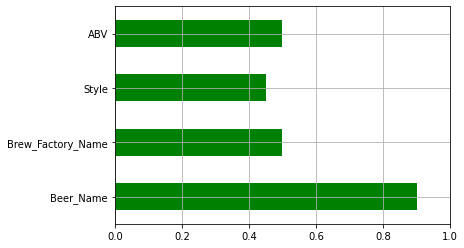

In [29]:
pos_explanations[0:4].plot.barh(color='green',grid=True,xlim=(0,1))

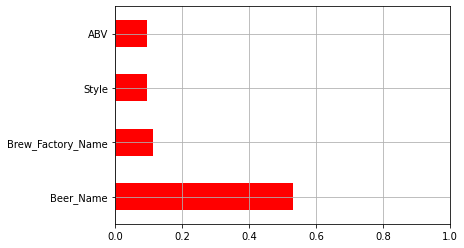

In [30]:
neg_explanations[0:4].plot.barh(color='red',grid=True,xlim=(0,1))